In [22]:
import numpy as np
import pandas as pd
from scipy.stats import expon
import math
import random
import popn_sim 
import matplotlib.pyplot as plt
from coal_prior import true_prior
random.seed(123)

In [27]:
#TMRCA
N = 50000
time = []
num = []
for i in range(N):
    n, e = true_prior()
    l = [x for x in e if x[-1]==0]
    time.append(e[-1][1])
    num.append(len(l)/2)
true_tmrca = sum(time)/N
true_number = sum(num)/N


(array([3.5555e+04, 1.0500e+04, 2.9060e+03, 7.5400e+02, 2.0200e+02,
        5.9000e+01, 1.8000e+01, 5.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

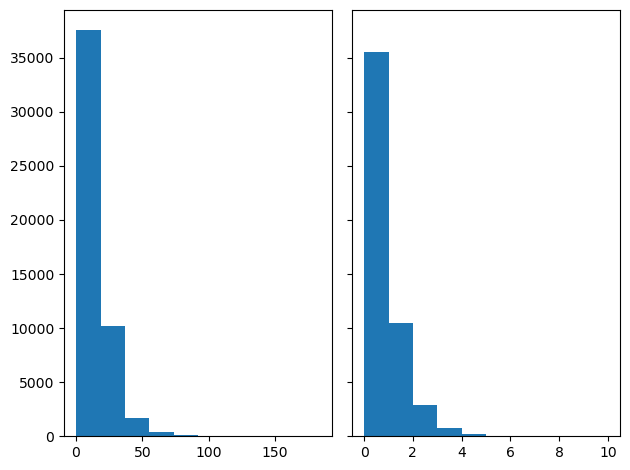

In [29]:
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(time)
axs[1].hist(num, bins=10)